In [16]:
#нормировка DataR,DataR_test по строкам с дефектами

import pandas as pd
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt

DataR = pd.read_csv('DataR.csv', header = 0, index_col=0)
R_test = pd.read_csv('DataR_test.csv', header = 0, index_col=0)

DataD = pd.read_csv('DataD.csv', header = 0, index_col=0)


D_id=DataD.columns[0]# id взятого дефекта


DCol=DataD[D_id] #колонка с наличием/отсутствием дефекта


DataRTrue=DataR[DCol==1]#берем только дефектные строки. Эта табличка нужна только для вычисления отклонения

s=list()

NewR=pd.DataFrame()
for i in range(len(DataR.columns)):
    M_id = DataR.columns[i]

    RCol = DataR[M_id]
    RColT = DataRTrue[M_id]
    
    RCol2=RCol-RColT.mean()#вычитаем среднее значение столбца
    if (RColT.std()!=0):
        RCol2=RCol2/RColT.std() #делим на среднеквадратичное отклонение
    RCol2=round(RCol2,5)
    s.append(round(RColT.std(),5))
    NewR[M_id]=RCol2

S1=pd.Series(s,index=NewR.columns)#среднеквадратические отклонения
s.clear()

NewR2=pd.DataFrame()
for i in range(len(R_test.columns)):
    M_id = R_test.columns[i]

    RCol = R_test[M_id]
    RColT = DataRTrue[M_id]
    
    RCol2=RCol-RColT.mean()#вычитаем среднее значение столбца
    if(S1[M_id]!=0):
        RCol2=RCol2/S1[M_id]#делим на среднеквадратичное отклонение
    RCol2=round(RCol2,5)
    
    NewR2[M_id]=RCol2

NewR.to_csv(r'DataRN.csv',index=True,header=True)
NewR2.to_csv(r'DataR_testN.csv',index=True,header=True)

S1.to_csv(r'SR.csv',index=True,header=False)#среднеквадратичное отклонение DataR
S2.to_csv(r'SR_test.csv',index=True,header=False)#среднеквадратичное отклонение DataR_test


             126       113      121      117      190      120
1701190 -3.22380  -3.84974 -1.87278 -5.43636 -0.64549 -1.44489
1701192 -3.22380  10.59926 -1.87278 -5.43636 -0.64549 -1.44489
1701194  0.30152   1.13761 -0.11638  0.47976 -0.64549 -0.86694
1701196 -1.46855   1.91281  0.08068  1.65127 -0.64549 -0.88834
1701198 -3.22380   3.31364  0.34414  2.86183 -0.64549 -0.51160
...          ...       ...      ...      ...      ...      ...
1811198 -2.29970  -0.53503  1.13452  3.78788 -0.64549 -1.44489
1811200 -2.22830  -0.37581  1.07883  3.81019 -0.64549 -1.44489
1811202 -2.26198  -0.49643  1.20735  3.94129 -0.64549 -1.44489
1811204 -2.27275  -0.45944  1.24804  3.94129 -0.64549 -1.44489
1811206 -2.25928  -0.45301  1.10882  3.91898 -0.64549 -1.44489

[12746 rows x 6 columns]
             126      113      121      117      190      120
1706022  0.52110 -0.41280 -0.72898 -0.06415  1.29645  0.81128
1706024  0.45105 -0.48035 -0.75468 -0.13947  1.28552  0.87978
1706040 -1.39850  1.83239  0.052

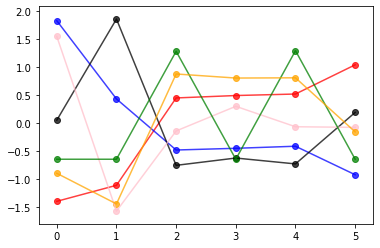

In [15]:
import pandas as pd
import pandas.plotting as pp
import numpy as np
#np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning':0})
#import collections as col
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

DataD = pd.read_csv('DataD.csv', header = 0, index_col=0)
DataRN = pd.read_csv('DataRN.csv', header = 0, index_col=0)
R_testN = pd.read_csv('DataR_testN.csv', header = 0, index_col=0)

S1 = pd.read_csv('SR.csv', index_col=0,header=None).T.iloc[0]
S2 = pd.read_csv('SR_test.csv', index_col=0,header=None).T.iloc[0]

D_id=DataD.columns[0]# id взятого дефекта

DCol=DataD[D_id] #колонка с наличием/отсутствием дефекта

S1=S1.sort_values(ascending=False)
S2=S2.sort_values(ascending=False)
l1=list()
l2=list()
z=6 #сколько у нас анализируется материалов
for i in range(z):
    l1.append(str(S1.index[i]))
    l2.append(str(S2.index[i]))

#Датафрейм, в котором лежат 6 наиболее используемых материалов

Data6=pd.DataFrame(DataRN,columns=l1)
print(Data6)

DataDef=Data6[DCol==1]
print(DataDef)
DataDef=DataDef.sort_values(by=[DataDef.columns[0]])

#Визуализация
plt.figure()
colors = ['red', 'blue', 'black', 'pink','green','orange']
i=range(len(DataDef.index))
k=0
for j in Data6.columns:
    if(k>z): k=0
    plt.scatter(i,DataDef[j],alpha=0.75,color=colors[k])
    plt.plot(i,DataDef[j],alpha=0.75,color=colors[k])
    k+=1

